# Electricity Consumption and Production
 Power Consumption as well as Production in Romania with respect to different Power Production types of both Renewanle and Non-Renewable Energy sources. 

## Importing Important Python Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Readind the Data from Kaggle

In [20]:
df = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')

## Exploratory Data Analysis Begins

In [21]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [22]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [24]:
df.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
std,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554
min,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000


In [25]:
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [26]:
df.shape

(46011, 9)

# Plotting of Individual Power Consumption over time and Power Production over time.

Plotted in 3 separate charts:

+ Power Consumption over Time
+ Power Production over Time
+ Power Production vs Consumption over Time

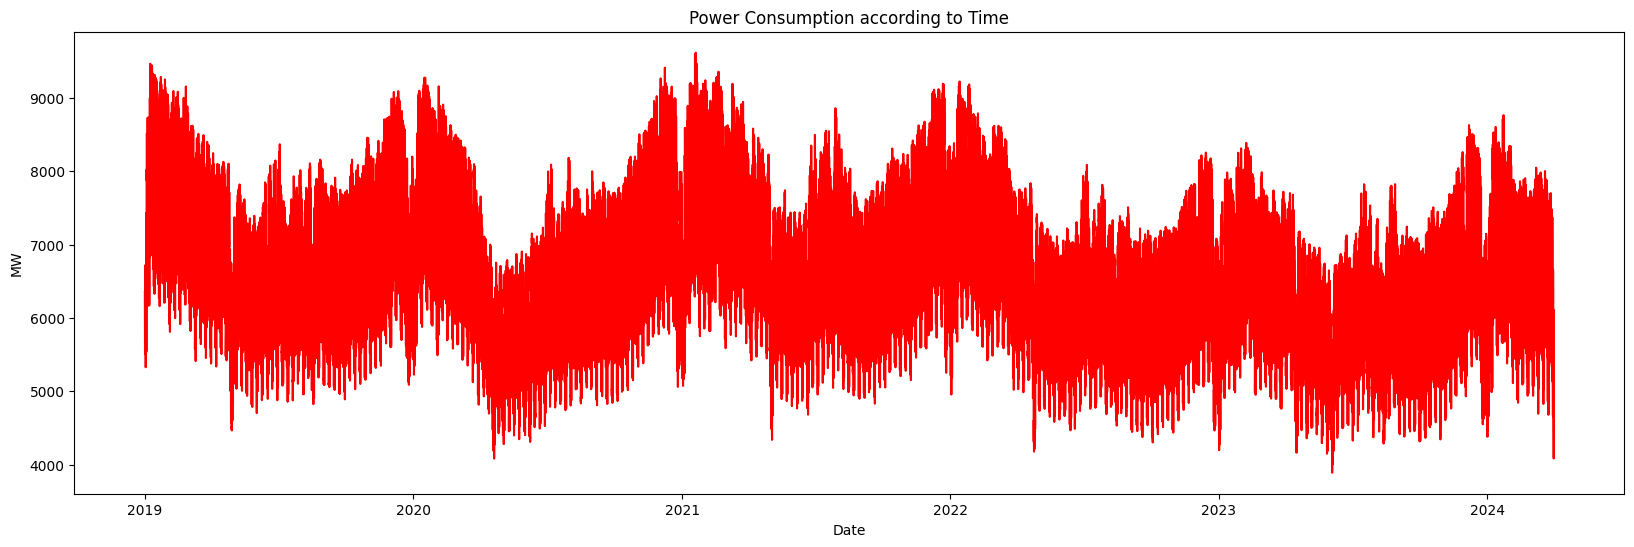

In [27]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Consumption'], 'r')
plt.title('Power Consumption according to Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

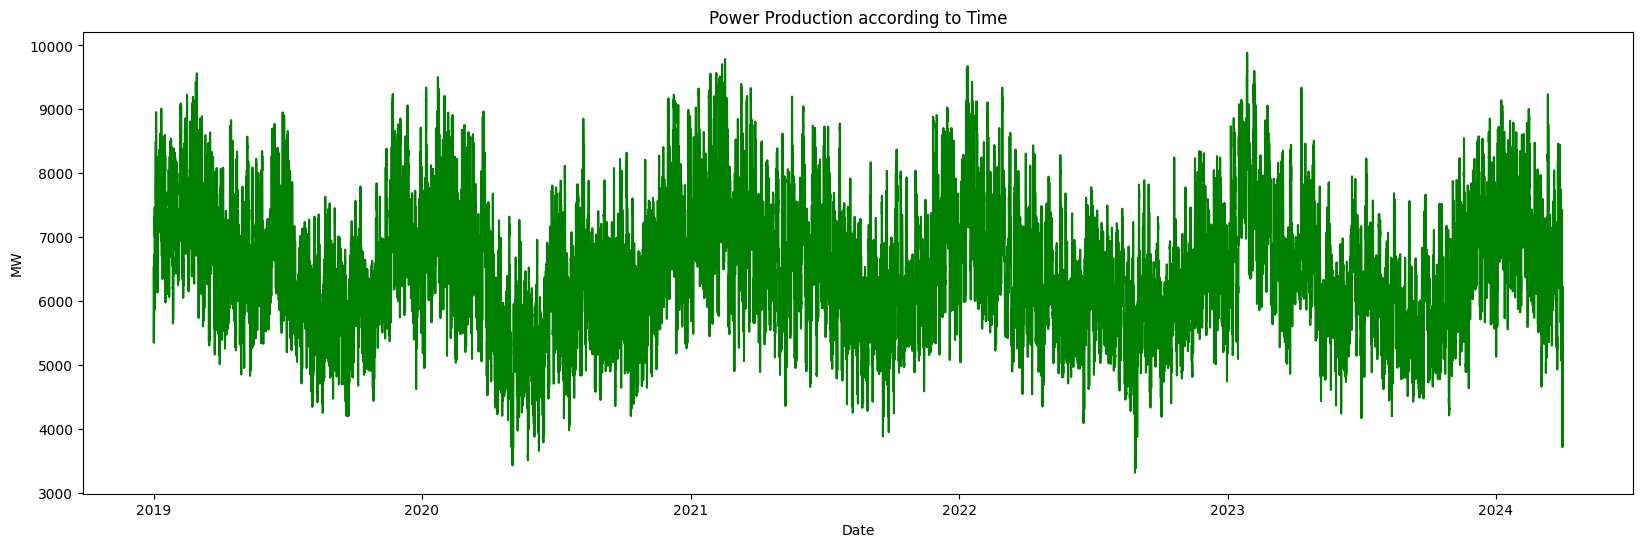

In [28]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Production'], 'g')
plt.title('Power Production according to Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

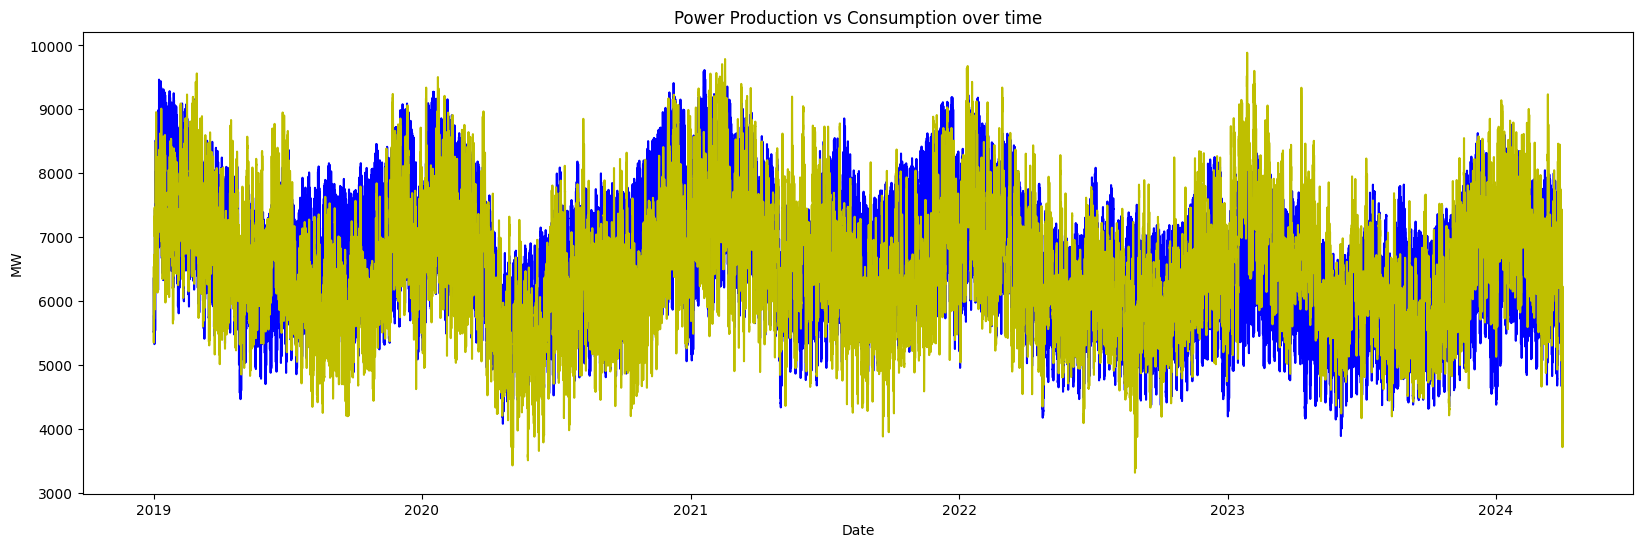

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Consumption'], 'b')
plt.plot(df.index, df['Production'], 'y')
plt.title('Power Production vs Consumption over time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

# Plotting of every kind of Production of Power in Romania.

This will show the trend of Power Production in different fields. This will also show how Renewable Energy Sources like Solar Power, Hydrolectric Power and Biogas is nowadays playing a great role.

In [30]:
Types = list(df.columns)
Types.pop(0)
Types.pop(0)
Types

['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

In [31]:
colors = {'Nuclear':'orange', 'Wind':'aquamarine', 'Hydroelectric':'b', 'Oil and Gas':'saddlebrown', 'Coal':'black', 'Solar':'y', 'Biomass':'crimson'}

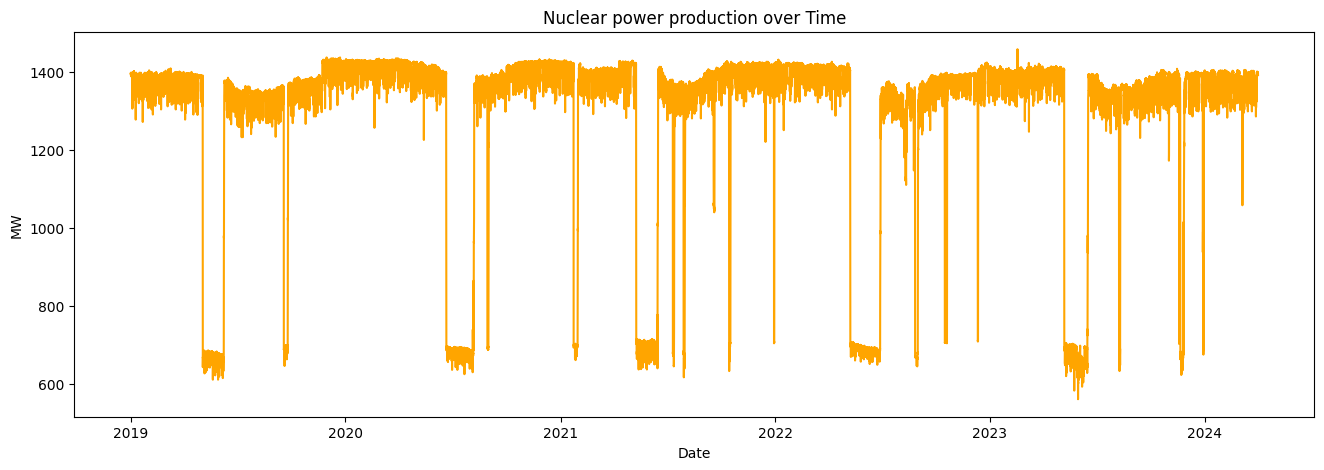

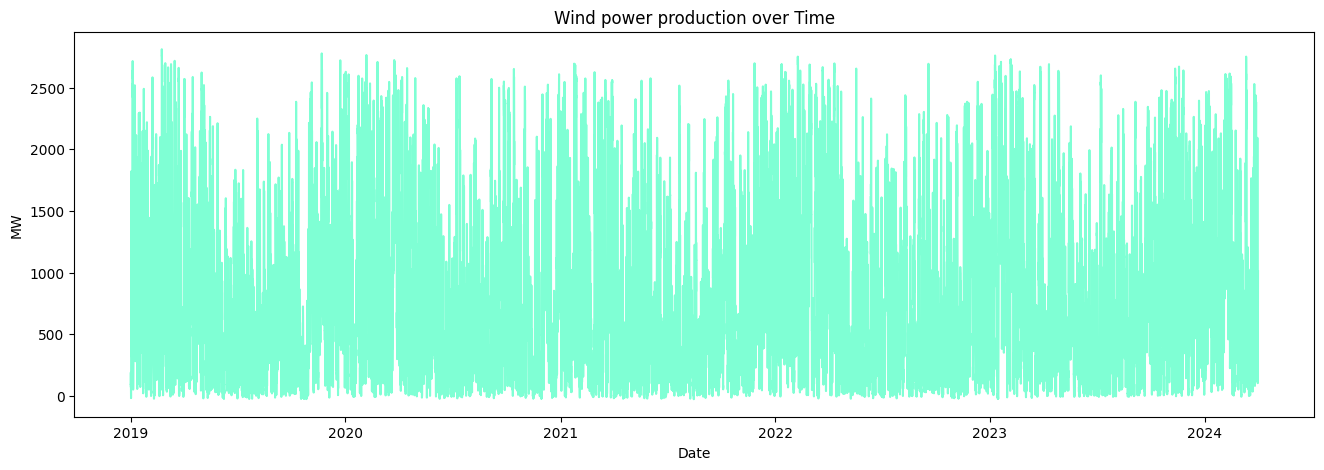

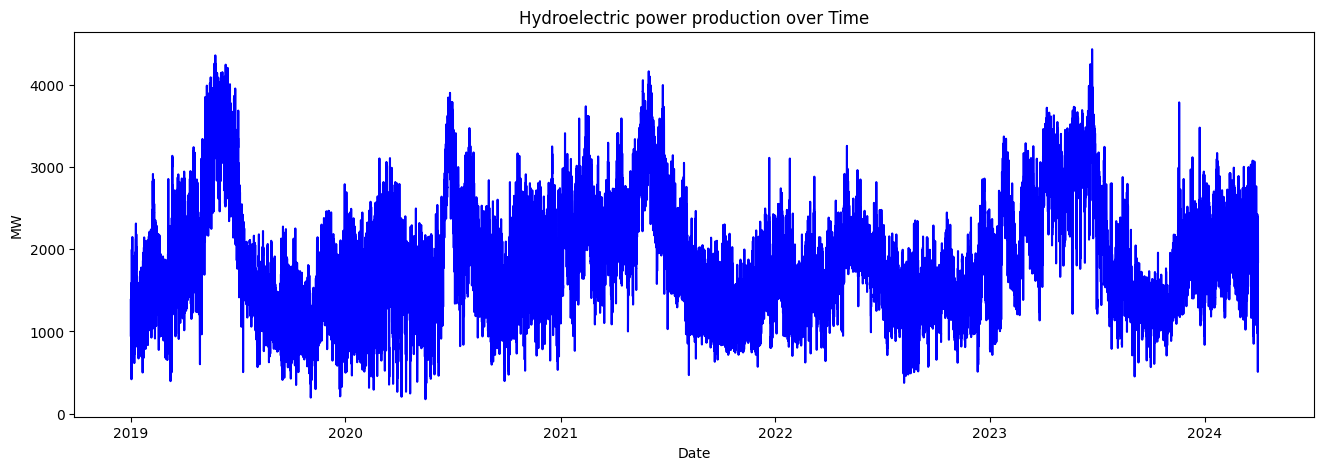

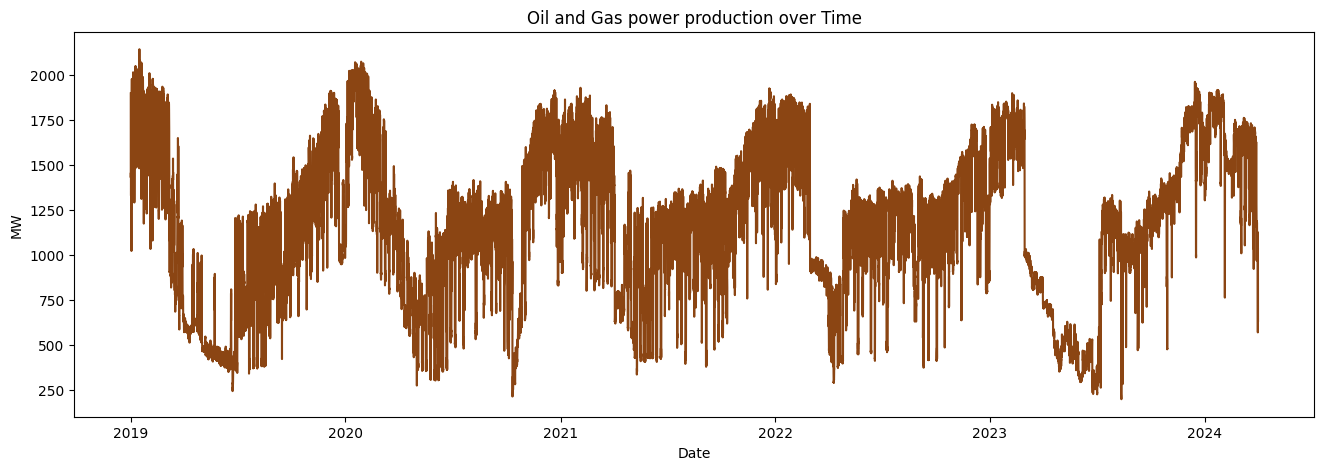

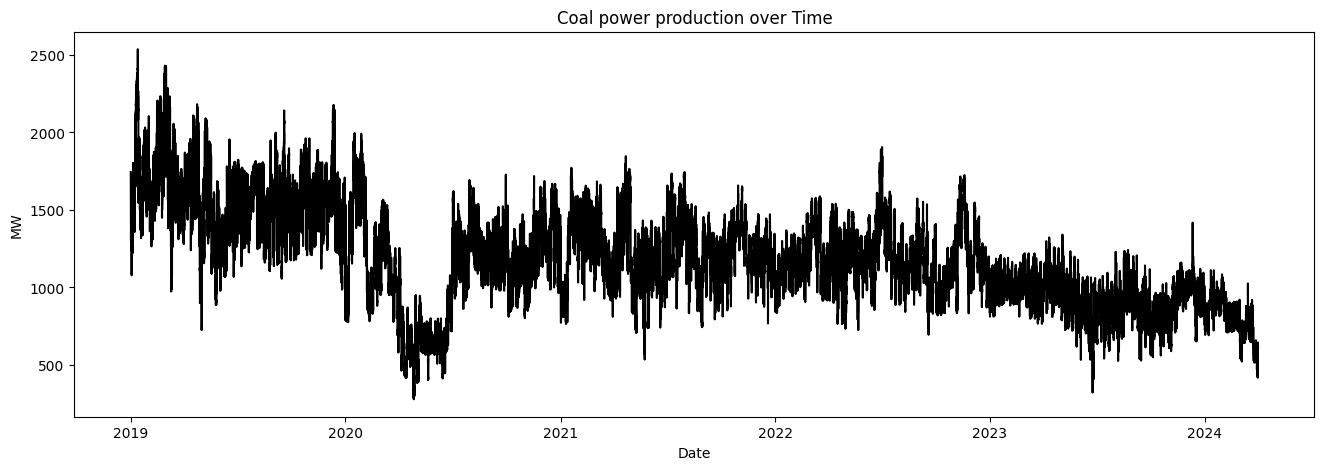

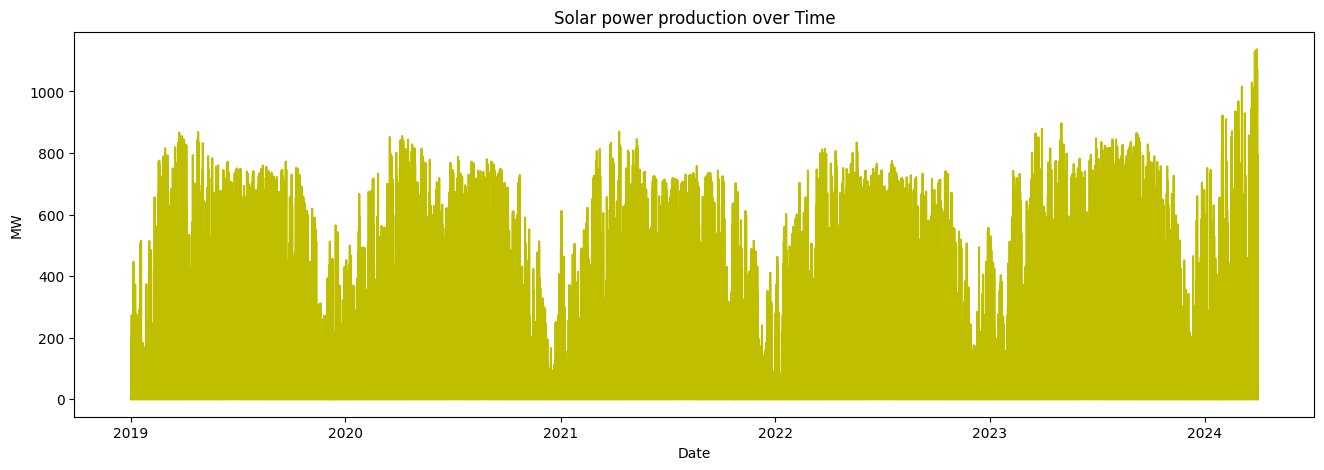

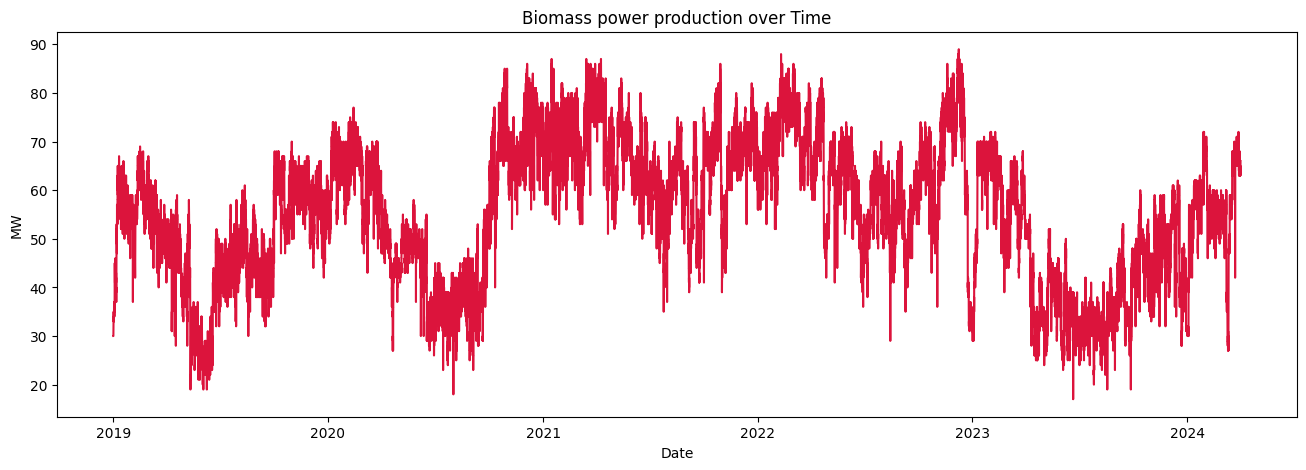

In [32]:
for prType in Types:
    plt.figure(figsize=(16,5))
    plt.plot(df.index, df[prType], color=colors.get(prType))
    plt.title(f'{prType} power production over Time')
    plt.xlabel('Date')
    plt.ylabel('MW')
    plt.show()

## Making Individual DateTime attributes like Year, Month, Day and Week of the Day

This is used so that the data can be grouped by for further analysis.

In [33]:
df['Day'] = df.index.day
df['Year'] = df.index.year
df['Month'] = df.index.month
df['WeekDay'] = df.index.day_name()

# Power Consumption by Day of the Week

This chart show the Consumption of Power to Production for each week of the Day.

In [34]:
dfbyDay = df.groupby('WeekDay').mean()

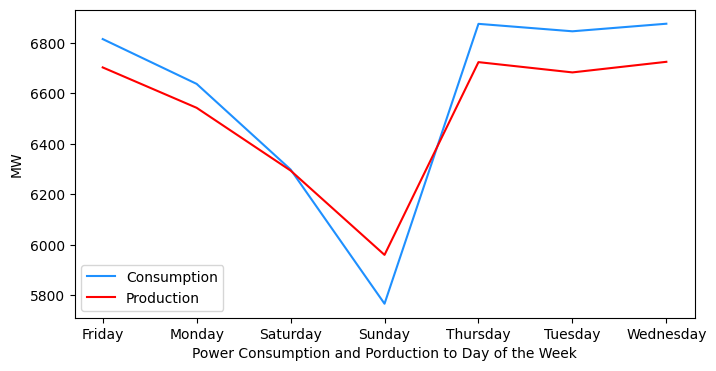

In [35]:
plt.figure(figsize=(8,4))
plt.plot(dfbyDay.index, dfbyDay['Consumption'], 'dodgerblue')
plt.plot(dfbyDay.index, dfbyDay['Production'], 'r')
plt.xlabel('Power Consumption and Porduction to Day of the Week')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()